In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loaders import load_features

In [2]:
features = load_features()
features_ = features.drop(columns=['video_id']) #.dropna()
features_

,category_id,publish_weekday,publish_hour,like_ratio,likes_per_view,dislikes_per_view,comments_per_view,title_num_chars,title_num_words,title_num_uppercase_words,...,faces_angry,faces_disgust,faces_fear,faces_happy,faces_neutral,faces_sad,faces_surprise,text_area,text_centroid_x,text_centroid_y
0,NaN,4,7,0.844573,0.007707,0.001418,0.001312,45,7,0,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
1,NaN,6,6,0.917645,0.024260,0.002177,0.002617,43,15,1,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
2,NaN,4,17,0.947740,0.045891,0.002531,0.007336,43,13,0,...,0,0,0,0,0,0,0,0.419853,25.809107,55.878284
3,NaN,0,2,0.941463,0.006934,0.000431,0.001329,76,15,0,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
4,NaN,0,1,0.937500,0.003057,0.000204,0.003057,55,9,0,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,NaN,2,18,0.753010,0.025024,0.008208,0.005323,40,8,0,...,0,0,0,0,0,0,1,0.000000,NaN,NaN
8603,NaN,1,18,0.966927,0.043077,0.001473,0.005790,29,7,4,...,0,0,0,0,0,0,1,0.000000,NaN,NaN
8604,NaN,2,15,0.960105,0.009474,0.000394,0.003082,94,17,1,...,0,0,1,0,0,0,0,0.000000,NaN,NaN
8605,NaN,1,16,0.953487,0.026300,0.001283,0.002242,66,15,0,...,0,0,0,0,0,0,0,0.046569,58.500000,26.500000


In [3]:
dropped_columns = set()
selected_attributes = list()

In [4]:
# simple variance check
from sklearn.feature_selection import VarianceThreshold

var_threshold = VarianceThreshold()
var_threshold.fit(features_)
zero_variance_columns = set(features_.columns[~var_threshold.get_support()])
features_ = features_.drop(columns=zero_variance_columns)
dropped_columns |= zero_variance_columns
zero_variance_columns

{'description__avail',
 'description__courtesi',
 'description__gondwana',
 'description__imag',
 'description__jimmi',
 'description__noggin',
 'description__youtub',
 'faces_disgust',
 'faces_neutral',
 'faces_sad',
 'tag__breaking news',
 "tag__cait o'riordan",
 'tag__felix rosenqvist',
 'tag__happening now',
 'tag__harvey weinstein',
 'tag__hollywood',
 'tag__how to',
 'tag__john sheehan',
 'tag__latest news',
 'tag__life noggin channel',
 'tag__ps4',
 'tag__qualification race',
 'tag__renger van der zande',
 'tag__rose mcgowan',
 "tag__rose's army",
 'tag__sharon shannon',
 'tag__talk show',
 'tag__the pogues',
 'tag__traffic jam',
 'tag__us news',
 'title__alleg',
 'title__christma',
 'title__cup',
 'title__espn',
 'title__fia',
 'title__fortnit',
 'title__gt',
 'title__hd',
 'title__iphon',
 'title__jame',
 'title__jordan',
 'title__languag',
 'title__lebron',
 'title__macgowan',
 'title__mcgowan',
 'title__offici',
 'title__peterson',
 'title__rose',
 'title__shane',
 'title__s

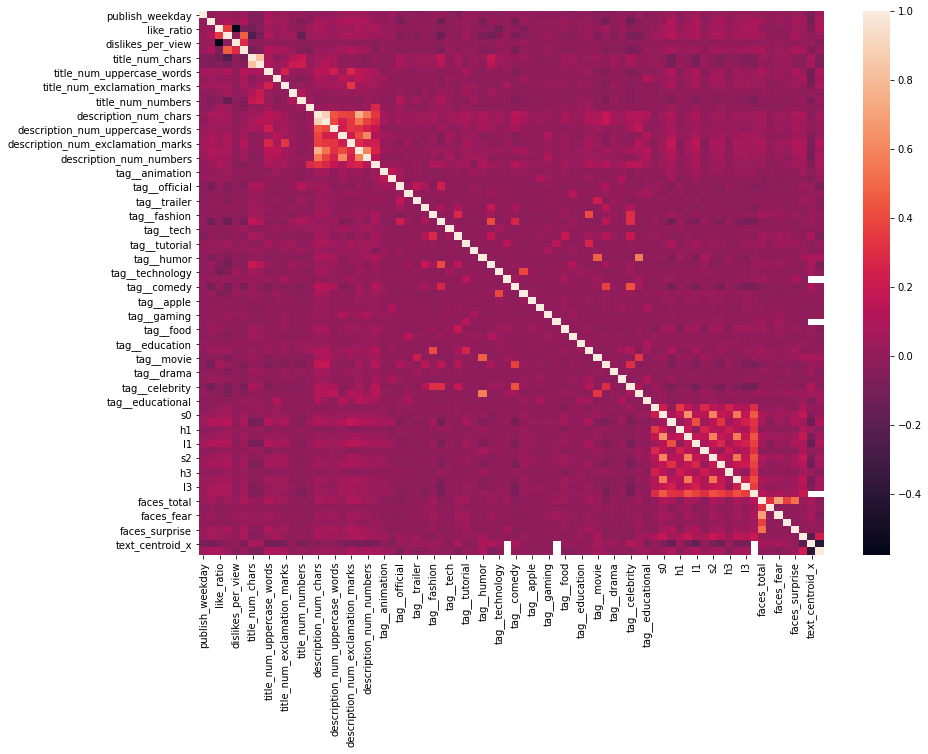

In [5]:
words = [col for col in features_.columns if col.startswith('title__') or col.startswith('description__')]
without_words = features_.drop(columns=words)
plt.figure(figsize=(14, 10))
sns.heatmap(without_words.corr())

In [6]:
obviously_related_pairs = [
    ('likes_per_view', 'dislikes_per_view'),
    ('title_num_chars', 'title_num_words'),
    ('description_num_chars', 'description_num_words'),
]

for kept, dropped in obviously_related_pairs:
    dropped_columns.add(dropped)
    features_ = features_.drop(columns=[dropped])

In [7]:
from sklearn.feature_selection import SelectPercentile, chi2

features_noempty = features_.dropna()
features_tested = features_noempty.drop(columns=['category_id', 'title_sentiment', 'description_sentiment'])
chi2_selector = SelectPercentile(chi2, percentile=80)
chi2_selector.fit(features_tested, features_noempty['category_id'])
print(features_tested.columns[chi2_selector.get_support()])
print(chi2_selector.scores_[chi2_selector.get_support()])

Index(['publish_weekday', 'publish_hour', 'like_ratio', 'likes_per_view',
       'comments_per_view', 'title_num_chars', 'title_num_uppercase_words',
       'title_num_question_marks', 'title_num_exclamation_marks',
       'title_num_periods', 'title_num_numbers', 'title__talk',
       'title__school', 'title__1', 'title__day', 'title__2018', 'title__de',
       'title__2017', 'description_num_chars',
       'description_num_uppercase_words', 'description_num_question_marks',
       'description_num_exclamation_marks', 'description_num_periods',
       'description_num_numbers', 'description__follow',
       'description__trailer', 'description__nhttp', 'description__deal',
       'description__news', 'description__ant', 'description__show',
       'description__life', 'description__tag', 'description__time',
       'description__game', 'description__music', 'description__new',
       'description__watch', 'description__truck', 'description__world',
       'tag__animation', 'tag__offic

['description_num_chars', 'description_num_periods', 'description_sentiment', 'description_num_words', 'description_num_numbers', 'title_num_uppercase_words', 'description__show', 'l1', 'description_num_question_marks', 'tag__science', 'publish_hour', 'tag__educational', 'description__life', 'tag__celebrity', 's2', 'tag__comedy', 'description__follow', 'tag__food', 'description__time', 'description__new', 'tag__beauty', 'tag__tech']


<BarContainer object of 22 artists>

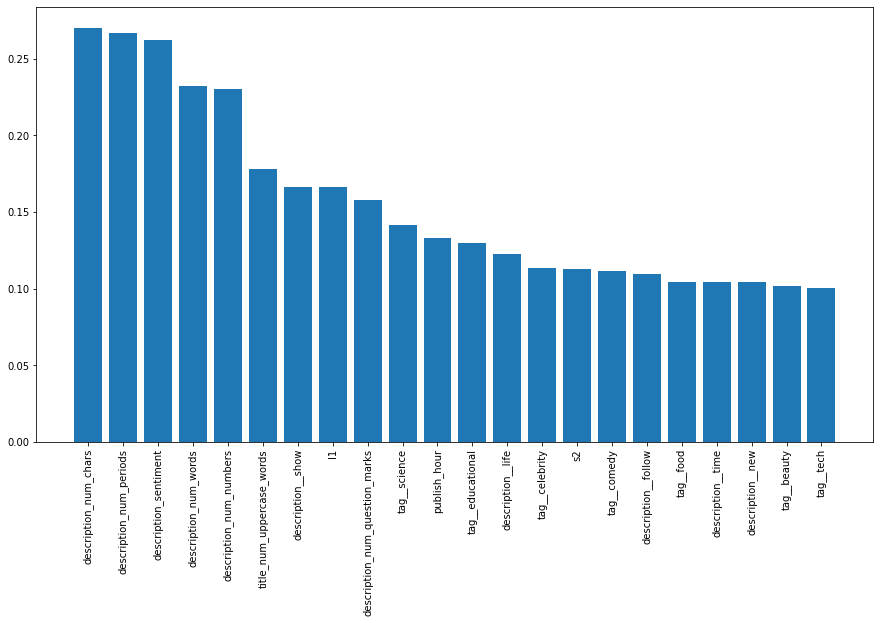

In [8]:
import math

features_ = features.drop(columns=['video_id']).dropna()
correlations = []
for col_name in features_.columns:
    col = features_[col_name]
    if any(col_name.startswith(prefix) for prefix in ['title__', 'description__', 'tag__']):
        col = col.astype(np.float32)
    corr = features_['category_id'].corr(col)
    if not math.isnan(corr):
        correlations.append((col_name, corr))

correlated_features = sorted([row for row in correlations if 1 > row[1] > 0.1], key=lambda row: -abs(row[1]))

names = [row[0] for row in correlated_features]
values = [row[1] for row in correlated_features]

print(names)
selected_attributes.extend(names)

plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.bar(names, values)

In [9]:
len(features_.columns)

173

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# using logistic regression with penalty l2.
selection = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))
selection.fit(features_tested, features_noempty['category_id'])

selected_features = features_tested.columns[(selection.get_support())]
print(features_tested.columns[(selection.get_support())])
print(len(selected_features))

selected_attributes.extend(selected_features.values)

Index(['publish_weekday', 'like_ratio', 'title_num_uppercase_words',
       'title_num_question_marks', 'title_num_exclamation_marks',
       'title_num_periods', 'title_num_numbers', 'title__1', 'title__2018',
       'title__2017', 'description_num_question_marks', 'description__follow',
       'description__trailer', 'description__nhttp', 'description__news',
       'description__show', 'description__life', 'description__time',
       'description__game', 'description__music', 'description__new',
       'description__watch', 'description__world', 'tag__official',
       'tag__trailer', 'tag__fashion', 'tag__highlights', 'tag__pop',
       'tag__sports', 'tag__technology', 'tag__comedy', 'tag__science',
       'tag__food', 'tag__beauty', 'tag__movie', 'tag__music', 'tag__drama',
       'tag__celebrity', 'tag__funny', 'has_image', 'faces_total',
       'faces_angry', 'faces_fear', 'faces_happy', 'faces_surprise'],
      dtype='object')
45


In [11]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# using logistic regression with penalty lasso.
selection = SelectFromModel(LassoCV())
selection.fit(features_tested, features_noempty['category_id'])

selected_features = features_tested.columns[(selection.get_support())]
print(features_tested.columns[(selection.get_support())])
print(len(selected_features))

selected_attributes.extend(selected_features.values)

Index(['description_num_chars'], dtype='object')
1


In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)
model.fit(features_tested, features_noempty['category_id'])

importances = model.feature_importances_

final_df = pd.DataFrame({"Features": features_tested.columns, "Importances":importances})
final_df.set_index('Importances')

final_df = final_df.sort_values('Importances', ascending=False)

                            Features  Importances
3                     likes_per_view     0.042722
112                  text_centroid_x     0.038519
41           description_num_periods     0.038376
37             description_num_chars     0.038023
113                  text_centroid_y     0.037956
4                  comments_per_view     0.033891
2                         like_ratio     0.033662
5                    title_num_chars     0.032547
42           description_num_numbers     0.031886
102                               h3     0.031541
104                               l3     0.031256
111                        text_area     0.031169
94                                s0     0.030709
93                                h0     0.030270
95                                l0     0.030198
98                                l1     0.030178
101                               l2     0.029026
96                                h1     0.029013
1                       publish_hour     0.028032


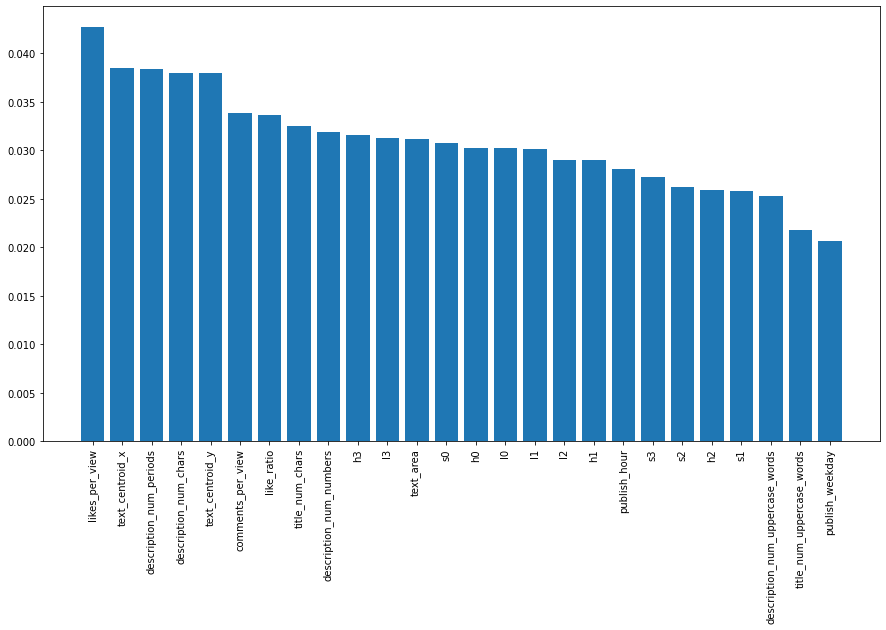

In [13]:
top_df = final_df[final_df["Importances"] > 0.02]
print(top_df)
print(len(top_df))

plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.bar(top_df['Features'], top_df['Importances'])

selected_attributes.extend(top_df[['Features']])

# Selected attributes

In [14]:
attr = pd.Series(selected_attributes)
print("All selected: " + str(attr.drop_duplicates().size))
print("Duplicates:")
print(attr[attr.duplicated()].values)
print("Duplicates size: " + str(attr[attr.duplicated()].size))

# res = features_[['title_num_uppercase_words', 'title_num_question_marks',
#  'title_num_exclamation_marks', 'description__show', 'tag__science',
#  'tag__beauty', 'faces_total', 'faces_happy', 'description_num_chars',
#  'description_num_periods', 'description_num_numbers', 'l0', 'l2',
#  'text_centroid_y']]
# plt.figure(figsize=(14, 10))
# sns.heatmap(res.corr())

All selected: 56
Duplicates:
['title_num_uppercase_words' 'description_num_question_marks'
 'description__follow' 'description__show' 'description__life'
 'description__time' 'description__new' 'tag__comedy' 'tag__science'
 'tag__food' 'tag__beauty' 'tag__celebrity' 'description_num_chars']
Duplicates size: 13


In [19]:
attr[attr.duplicated()].values

array(['title_num_uppercase_words', 'description_num_question_marks',
       'description__follow', 'description__show', 'description__life',
       'description__time', 'description__new', 'tag__comedy',
       'tag__science', 'tag__food', 'tag__beauty', 'tag__celebrity',
       'description_num_chars'], dtype=object)